In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data/train.csv', nrows=10000000)

In [4]:
sparse_features = ['site_id','site_domain','site_category','app_id','app_domain','app_category','device_id','device_ip','device_model' ]
dense_features = ['id','hour','C1','device_type','device_conn_type','C14','C15','C16','C17','C18','C19','C20','C21']
target = ['click']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 1.8+ GB


In [6]:
data.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


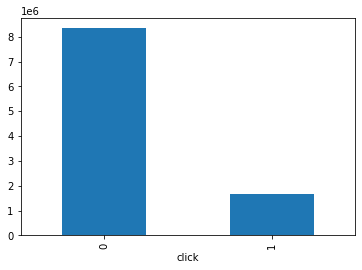

In [7]:
data.groupby('click').size().plot(kind='bar')

In [9]:
data['click'].value_counts() / data.shape[0]

0    0.833864
1    0.166136
Name: click, dtype: float64

In [10]:
data.hour.describe()

count    1.000000e+07
mean     1.410217e+07
std      5.770986e+01
min      1.410210e+07
25%      1.410211e+07
50%      1.410220e+07
75%      1.410221e+07
max      1.410230e+07
Name: hour, dtype: float64

In [14]:
data['banner_pos'].unique()

array([0, 1, 4, 5, 2, 7, 3])

In [15]:
train_banner_pos_group_df = data.groupby(['banner_pos', 'click']).size().unstack()

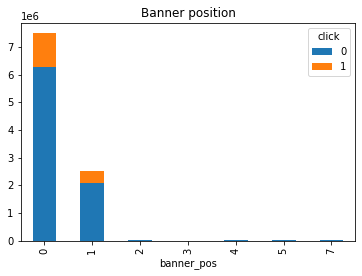

In [16]:
train_banner_pos_group_df.plot(kind='bar', stacked=True, title='Banner position')

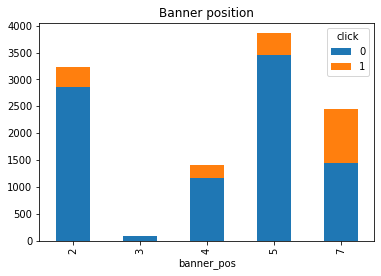

In [17]:
train_banner_pos_group_df.iloc[2:].plot(kind='bar', stacked=True, title='Banner position')

In [18]:
train_banner_pos_group_df / data.shape[0]

click,0,1
banner_pos,,
0,0.626780,1.219600e-01
1,0.206182,4.397560e-02
2,0.000286,3.670000e-05
3,0.000008,3.000000e-07
4,0.000117,2.320000e-05
5,0.000345,4.050000e-05
7,0.000145,9.940000e-05


In [19]:
site_features = ['site_id', 'site_domain', 'site_category']

In [20]:
data[site_features].describe()

,site_id,site_domain,site_category
count,10000000,10000000,10000000
unique,3496,4585,23
top,85f751fd,c4e18dd6,50e219e0
freq,3809647,3939930,4169502


In [21]:
app_features = ['app_id', 'app_domain', 'app_category']

In [22]:
data[app_features].describe()

,app_id,app_domain,app_category
count,10000000,10000000,10000000
unique,5469,390,33
top,ecad2386,7801e8d9,07d7df22
freq,6190353,6548642,6292277


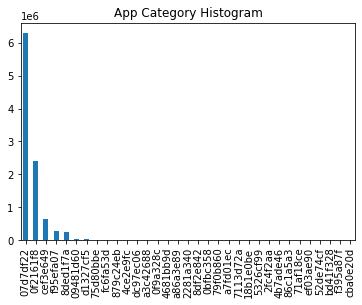

In [23]:
data['app_category'].value_counts().plot(kind='bar', title='App Category Histogram')

In [25]:
train_app_category_group_df = data.groupby(['app_category', 'click']).size().unstack()

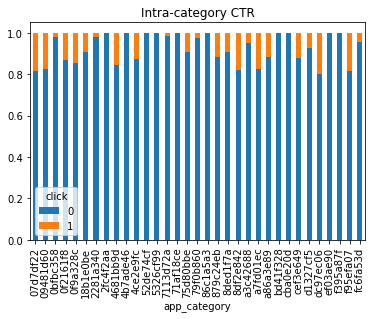

In [26]:
train_app_category_group_df.div(train_app_category_group_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR")


In [27]:
device_features = ['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']


In [30]:
data[device_features].astype('object').describe()

,device_id,device_ip,device_model,device_type,device_conn_type
count,10000000,10000000,10000000,10000000,10000000
unique,786741,2129662,6863,4,4
top,a99f214a,6b9769f2,8a4875bd,1,0
freq,8148098,50991,618758,9356219,8918789


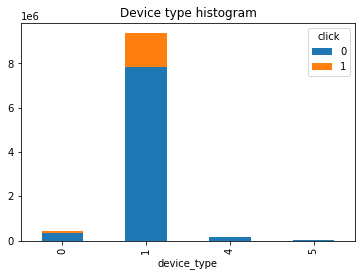

In [31]:
data.groupby(['device_type', 'click']).size().unstack().plot(kind='bar', stacked=True, title='Device type histogram')


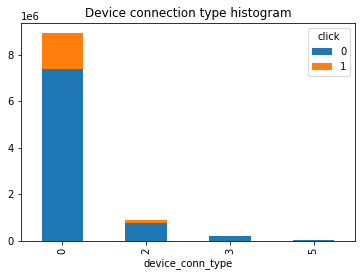

In [32]:
data.groupby(['device_conn_type', 'click']).size().unstack().plot(kind='bar', stacked=True, title='Device connection type histogram')


In [33]:
data[sparse_features].astype('object').describe()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
unique,3496,4585,23,5469,390,33,786741,2129662,6863
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,3809647,3939930,4169502,6190353,6548642,6292277,8148098,50991,618758


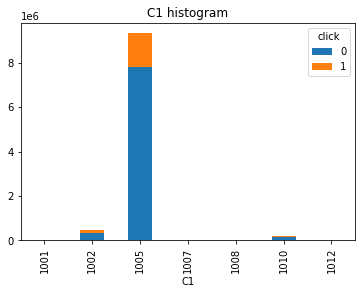

In [34]:

data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 histogram')

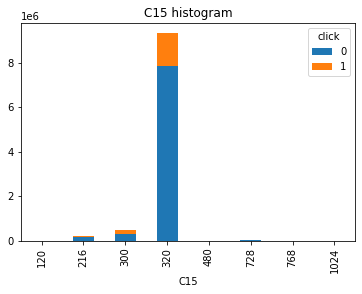

In [35]:
data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 histogram')


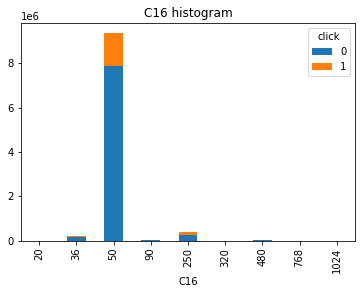

In [36]:
data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 histogram')

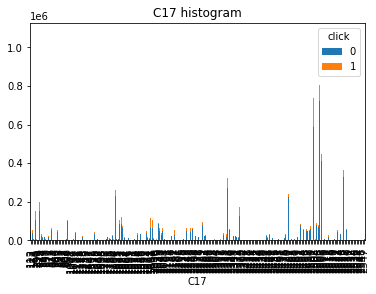

In [37]:
data.groupby(['C17', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C17 histogram')

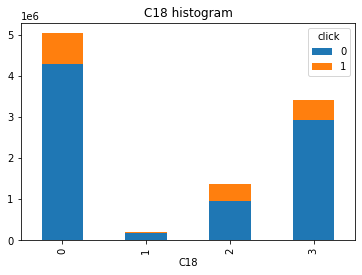

In [38]:
data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 histogram')

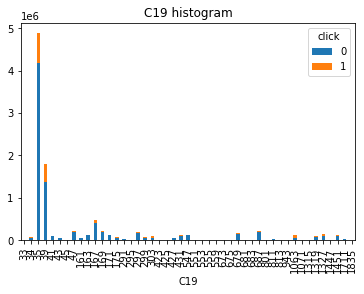

In [41]:
data.groupby(['C19', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C19 histogram')

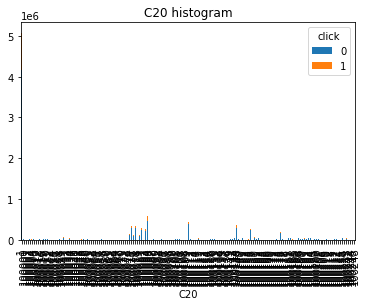

In [39]:
data.groupby(['C20', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C20 histogram')

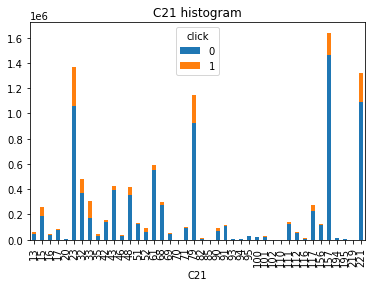

In [40]:
data.groupby(['C21', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C21 histogram')